# TensorFlow Basic Operations

TensorFlow is a deep learning framework.
- 使用图 (graph) 来表示计算任务.
- 在被称之为 会话 (Session) 的上下文 (context) 中执行图.
- 使用 tensor 表示数据.
- 通过 变量 (Variable) 维护状态.
- 使用 feed 和 fetch 可以为任意的操作(arbitrary operation) 赋值或者从其中获取数据.

Refer to: http://wiki.jikexueyuan.com/project/tensorflow-zh/get_started/basic_usage.html

## Construct graph
构建图的第一步, 是创建源 operation (source op). 源 op 不需要任何输入, 例如 常量 (Constant). 源 op 的输出被传递给其它 op 做运算.
Python 库中, op 构造器的返回值代表被构造出的 op 的输出, 这些返回值可以传递给其它 op 构造器作为输入.
TensorFlow Python 库有一个默认图 (default graph), op 构造器可以为其增加节点. 这个默认图对许多程序来说已经足够用了.

In [1]:
import tensorflow as tf

# 创建一个常量 op, 产生一个 1x2 矩阵. 这个 op 被作为一个节点
# 加到默认图中.
#
# 构造器的返回值代表该常量 op 的返回值.
matrix1 = tf.constant([[3., 3.]])

# 创建另外一个常量 op, 产生一个 2x1 矩阵.
matrix2 = tf.constant([[2.],[2.]])

# 创建一个矩阵乘法 matmul op , 把 'matrix1' 和 'matrix2' 作为输入.
# 返回值 'product' 代表矩阵乘法的结果.
product = tf.matmul(matrix1, matrix2)

print("matrix1:", matrix1)
print("matrix2:", matrix2)
print("product:", product)

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


matrix1: Tensor("Const:0", shape=(1, 2), dtype=float32)
matrix2: Tensor("Const_1:0", shape=(2, 1), dtype=float32)
product: Tensor("MatMul:0", shape=(1, 1), dtype=float32)


默认图现在有三个节点, 两个 constant() op, 和一个matmul() op. 为了真正进行矩阵相乘运算, 并得到矩阵乘法的结果, 你必须在会话里启动这个图.

## 在一个会话中启动图
构造阶段完成后, 才能启动图. 启动图的第一步是创建一个 Session 对象, 如果无任何创建参数, 会话构造器将启动默认图.

In [2]:
# 启动默认图.
sess = tf.Session()

# 调用 sess 的 'run()' 方法来执行矩阵乘法 op, 传入 'product' 作为该方法的参数. 
# 上面提到, 'product' 代表了矩阵乘法 op 的输出, 传入它是向方法表明, 我们希望取回
# 矩阵乘法 op 的输出.
#
# 整个执行过程是自动化的, 会话负责传递 op 所需的全部输入. op 通常是并发执行的.
# 
# 函数调用 'run(product)' 触发了图中三个 op (两个常量 op 和一个矩阵乘法 op) 的执行.
#
# 返回值 'result' 是一个 numpy `ndarray` 对象.
result = sess.run(product)
print(result)
# ==> [[ 12.]]

# 任务完成, 关闭会话.
sess.close()

[[12.]]


Session 对象在使用完后需要关闭以释放资源. 除了显式调用 close 外, 也可以使用 "with" 代码块 来自动完成关闭动作.

In [3]:
with tf.Session() as sess:
  result = sess.run([product])
  print(result)

[array([[12.]], dtype=float32)]


## Tensor
TensorFlow 程序使用 tensor 数据结构来代表所有的数据, 计算图中, 操作间传递的数据都是 tensor. 你可以把 TensorFlow tensor 看作是一个 n 维的数组或列表. 一个 tensor 包含一个静态类型 rank, 和 一个 shape.

## Variables
变量维护图执行过程中的状态信息

In [4]:
v1 = tf.Variable(0.1, dtype=tf.float32, name='w1', trainable=False)
v2 = tf.Variable([0.1], dtype=tf.float32, name='w1')
v3 = tf.Variable([[0.1], [0.3]], dtype=tf.float32)

print('v1:', v1)
print('v2:', v2)
print('v3:', v3)


v1: <tf.Variable 'w1:0' shape=() dtype=float32_ref>
v2: <tf.Variable 'w1_1:0' shape=(1,) dtype=float32_ref>
v3: <tf.Variable 'Variable:0' shape=(2, 1) dtype=float32_ref>


变量的声明：
- TensorFlow中使用了命名空间管理，如‘W1_2:0"是变量v1在命名空间中的一个名称
- Shape
- 变量的类型
- trainable: 如果想固定某个参数，则设置为False。否则，变量在神经网络训练的过程中会通过迭代不停的更新该参数

声明变量后，需要初始化后再启动Session来得到变量的值。

In [5]:
init = tf.global_variables_initializer()

sess =  tf.Session()
sess.run(init)

In [6]:
print('v1:',sess.run(v1))
print('v2:',sess.run(v2))
print('v3:',sess.run(v3))

v1: 0.1
v2: [0.1]
v3: [[0.1]
 [0.3]]


### Constants

每次创建了新的变量、常量，都要执行初始化。

In [7]:
c1 = tf.constant([1.0], dtype=tf.float32)
c2 = tf.constant([1.0, 2.0], dtype=tf.float32)

print('c1:', c1)
print('c2:', c2)

c1: Tensor("Const_2:0", shape=(1,), dtype=float32)
c2: Tensor("Const_3:0", shape=(2,), dtype=float32)


In [8]:
sess = tf.Session()
sess.run(init)

print('c1:', sess.run(c1))
print('c2:', sess.run(c2))

c1: [1.]
c2: [1. 2.]


### tf.get_variable to create variables

In [9]:
w1_1 = tf.get_variable(name='w1_1', shape=[3,4], initializer=tf.truncated_normal_initializer())
b1_1 = tf.get_variable('b1_1', [3,1])

print('w11:', w1_1)
print('b11:', b1_1)

w11: <tf.Variable 'w1_1_1:0' shape=(3, 4) dtype=float32_ref>
b11: <tf.Variable 'b1_1:0' shape=(3, 1) dtype=float32_ref>


## Fetch
为了取回操作的输出内容, 可以在使用 Session 对象的 run() 调用执行图时, 传入一些 tensor, 这些 tensor 会帮助你取回结果. 

In [10]:
input1 = tf.constant(3.0)
input2 = tf.constant(2.0)
input3 = tf.constant(5.0)
intermed = tf.add(input2, input3)
mul = tf.multiply(input1, intermed)
output = tf.add(mul, input1)

with tf.Session() as sess:
  result = sess.run([output, intermed, mul])
  print(result)
    
#[result, intermed, mul]

[24.0, 7.0, 21.0]


### tf.placeholder() and feed method
tf.placeholder() only declares a place for the variable and wait for the data to feed。
TensorFlow 还提供了 feed 机制, 该机制可以临时替代图中的任意操作中的 tensor, 可以对图中任何操作提交补丁, 直接插入一个 tensor.

In [11]:
input1 = tf.placeholder(tf.float32)
input2 = tf.placeholder(tf.float32)
output = tf.multiply(input1, input2)
print('input1:', input1)
print('input2:', input2)
print('output:', output)

input1: Tensor("Placeholder:0", dtype=float32)
input2: Tensor("Placeholder_1:0", dtype=float32)
output: Tensor("Mul_1:0", dtype=float32)


In [12]:
with tf.Session() as sess:
    _out = sess.run([output], feed_dict={input1:[7.0], input2:[2.0]})
    print(_out)
    _out = sess.run([output], feed_dict={input1:[5.0], input2:[1.0]})
    print(_out)

[array([14.], dtype=float32)]
[array([5.], dtype=float32)]


### A simple example

In [13]:
# Add h_vec element and get the mean value
# First, write downt he computational graph

h_vec = tf.constant([1.0, 2.0, 3.0, 4,0])
h_sum = tf.Variable(0.0, dtype=tf.float32)
h_cur = tf.placeholder(tf.float32)

h_new = tf.add(h_sum, h_cur)
update = tf.assign(h_sum, h_new)


init = tf.global_variables_initializer()

sess =  tf.Session()
sess.run(init)
for i in range(4):
    sess.run([update], feed_dict = {h_cur: sess.run(h_vec[i])})
    print('round {}: h_vec[{}] = {}, h_sum = {}'.format(i, i, sess.run(h_vec[i]), sess.run(h_sum)))

round 0: h_vec[0] = 1.0, h_sum = 1.0
round 1: h_vec[1] = 2.0, h_sum = 3.0
round 2: h_vec[2] = 3.0, h_sum = 6.0
round 3: h_vec[3] = 4.0, h_sum = 10.0


## A machine learning example
- Preprae the data set
- Build a computational graph that describes the computation that you want to perform
- Run the computational graph many times

You can setup the GPU/CPU usage.

In [14]:
# Set up some global variables
USE_GPU = False

if USE_GPU:
    device = '/device:GPU:0'
else:
    device = '/cpu:0'

# Constant to control how often we print when training models
print_every = 100

print('Using device: ', device)

Using device:  /cpu:0


In [15]:
import tensorflow as tf
import numpy as np

# 1.Prepare the data set
X = np.float32(np.random.rand(100)) 
X = np.sort(X)
y = np.dot(0.200, X**2) + 0.300 + np.random.randn(100) * 0.01
X = X.reshape([-1, 1])
y = y.reshape([-1, 1])
print('X.shape=', X.shape)
print('y.shape=', y.shape)

X.shape= (100, 1)
y.shape= (100, 1)


In [16]:
Learning_rate = 0.5

# 2.Build a computational graph
b = tf.Variable(tf.zeros([1]))
W = tf.Variable(tf.random_uniform([1,1], -1.0, 1.0))
y_pre = tf.matmul(X**2, W) + b

loss = tf.reduce_mean(tf.square(y_pre - y))
optimizer = tf.train.GradientDescentOptimizer(Learning_rate)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()
sess.run(init)

# 3. Run the computational graph
for step in range(0, 201):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run(W), sess.run(b))


0 [[0.02065651]] [0.45748433]
20 [[0.16583924]] [0.3149182]
40 [[0.19494128]] [0.30238768]
60 [[0.19980137]] [0.30029508]
80 [[0.20061304]] [0.2999456]
100 [[0.20074858]] [0.29988724]
120 [[0.20077123]] [0.2998775]
140 [[0.20077501]] [0.29987586]
160 [[0.20077562]] [0.2998756]
180 [[0.20077565]] [0.2998756]
200 [[0.20077565]] [0.2998756]


In [17]:
_y_pre = sess.run(y_pre)   
print('y_pre:', _y_pre.reshape([-1])[:20])   
print('y_true:', y.reshape([-1])[:20]) 

y_pre: [0.2999333  0.30119202 0.30170152 0.3018381  0.30189735 0.30254564
 0.30282944 0.3035682  0.30467585 0.30498835 0.3057471  0.3061711
 0.30666307 0.3068964  0.30738682 0.30866098 0.30937698 0.31091976
 0.3110237  0.31230295]
y_true: [0.30432162 0.30943381 0.29645956 0.30638395 0.29639537 0.3167464
 0.30140735 0.30984627 0.2984033  0.29074186 0.31062984 0.29981529
 0.30753372 0.29687534 0.31182297 0.30880485 0.30674231 0.30186702
 0.31082161 0.32955973]


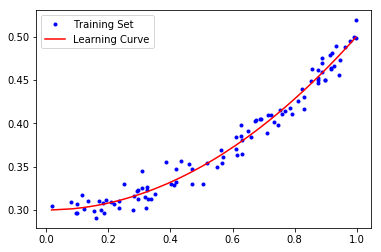

In [19]:
import matplotlib.pyplot as plt

plt.plot(X, y, 'b.', label='Training Set')
plt.plot(X, _y_pre, 'r-', label="Learning Curve")
plt.legend()
plt.show()